# Analyzing car sales on *eBay Kleinanzeigen*

Kevin Neal  
2019-10-04

Last updated 2019-10-10

In this project, I'll be exploring a dataset of used cars from *eBay Kleinanzeigen*, a classifieds section of the German eBay website. The dataset was scraped from the site and uploaded to Kaggle, and then subsampled and "dirtied" make it a little tougher to work with.

My aim is to clean the dataset and get an overview of the used car listings using pandas.

In [9]:
import pandas as pd
import numpy as np

autos = pd.read_csv("autos.csv", encoding="Latin-1") # need to specify Latin-1 encoding

In [10]:
# print info and head of the dataframe

autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


We can see that our dataframe has 50,000 rows and 20 columns, with missing data in several columns (max is about 20% missing data, for "notRepairedDamage". Only some of the columns have specified types; most are listed as "object" which likely means it's some unformatted string. We'll need to clean several of those. For example, "price" lists prices as, e.g., "$5,000", and "Odometer" lists mileage as e.g. "150,000km". We'll want to clean these entries to just integers.

Let's make the columns a bit easier to work with by rewording and converting to snakecase (i.e. using underscores).

In [11]:
autos.columns
# we could use autos.columns.str.lower() to make evyerthing lowercase, but we'll manually make everything snakecase

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [19]:
autos.rename({"yearOfRegistration":"registration_year",
              "monthOfRegistration":"registration_month",
              "notRepairedDamage":"unrepaired_damage",
              "dateCreated":"ad_created",
              "dateCrawled":"date_crawled",
              "offerType":"offer_type",
              "vehicleType":"vehicle_type",
              "powerPS":"powerps",
              "fuelType":"fuel_type",
              "nrOfPictures":"photo_count",
              "postalCode":"postal_code",
              "lastSeen":"last_seen"},
             axis=1, inplace=True)
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,photo_count,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


With the columns reformatted, they should be easier to read and work with - cosistency is key.

Now, let's do some data exploration to determine other cleaning tasks. We can look at unique values in text columns, for example - if a column has all or mostly the same value, it won't be useful and we can remove it. We can explore all the columns broadly using `describe(include="all")`, and individual columns as series using `value_counts()`.

In [21]:
autos.describe(include="all")

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,photo_count,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-21 20:37:19,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Using the `describe` method on the dataframe, we can see some obvious issues: 
* Some `registration_year` entries are impossible years, with a min of 1000 and max of 9999
* `powerps` shows a max of 17700, about 100x the mean
* `registration_month` is zero for some (i.e. missing data)
* Several columns have almost no unique values, and one value dominates the frequency. Based on this we can remove `seller` and `offer_type`, and all `photo_count` entries are zero so we can drop that as well



In [60]:
# drop useless columns

autos.drop(["seller", "offer_type", "photo_count"], axis=1, inplace=True)
autos.head()

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,powerps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000.0,control,bus,2004,manuell,158,andere,150000.0,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500.0,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990.0,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350.0,control,kleinwagen,2007,automatik,71,fortwo,70000.0,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350.0,test,kombi,2003,manuell,0,focus,150000.0,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


In [61]:
# remove non-numeric characters from price and odometer and convert to a numeric dtype (float or integer)

#autos["price"] = autos["price"].str.replace("$","").str.replace(",", "").astype(float)  # only run once - will throw an error trying to replace strings in a float or int
autos["price"].head()

0    5000.0
1    8500.0
2    8990.0
3    4350.0
4    1350.0
Name: price, dtype: float64

In [62]:
#autos["odometer"] = autos["odometer"].str.replace("km", "").str.replace(",", "").astype(float)
autos.rename({"odometer":"odometer_km"}, inplace=True, axis=1)
autos["odometer_km"].head()


0    150000.0
1    150000.0
2     70000.0
3     70000.0
4    150000.0
Name: odometer_km, dtype: float64

In [63]:
autos.head()



,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,powerps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000.0,control,bus,2004,manuell,158,andere,150000.0,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500.0,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990.0,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350.0,control,kleinwagen,2007,automatik,71,fortwo,70000.0,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350.0,test,kombi,2003,manuell,0,focus,150000.0,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


In [65]:
autos.describe(include="all")

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,powerps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
count,50000,50000,5.000000e+04,50000,44905,50000.000000,47320,50000.000000,47242,50000.000000,50000.000000,45518,50000,40171,50000,50000.000000,50000
unique,48213,38754,NaN,2,8,NaN,2,NaN,245,NaN,NaN,7,40,2,76,NaN,39481
top,2016-03-21 20:37:19,Ford_Fiesta,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,2016-04-07 06:17:27
freq,3,78,NaN,25756,12859,NaN,36993,NaN,4024,NaN,NaN,30107,10687,35232,1946,NaN,8
mean,NaN,NaN,9.840044e+03,NaN,NaN,2005.073280,NaN,116.355920,NaN,125732.700000,5.723360,NaN,NaN,NaN,NaN,50813.627300,NaN
std,NaN,NaN,4.811044e+05,NaN,NaN,105.712813,NaN,209.216627,NaN,40042.211706,3.711984,NaN,NaN,NaN,NaN,25779.747957,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN
25%,NaN,NaN,1.100000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,30451.000000,NaN
50%,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,49577.000000,NaN
75%,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,71540.000000,NaN


We've dropped uninformative columns and converted relevant columns from strings to floats. Now let's look more closely at some columns to identify major outliers. We'll look at `price` and `odometer_km`.

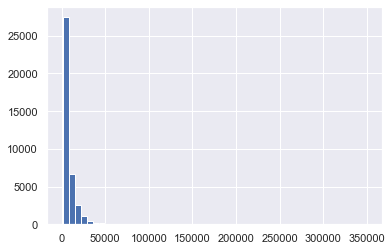

In [148]:
#import matplotlib.pyplot as plt
#import plotly.express as px
import seaborn as sns
sns.set()
import statistics # enables statistics.median()

#pricefig = px.histogram(autos, x="price")
#pricefig.show()

#sns.distplot(autos["price"])

# explore the histogram to see the distrubution and where outliers fall
autos["price"].hist(bins=50, range=[1000,350000])

In [85]:
autos["price"].unique().shape

(2357,)

In [86]:
autos["price"].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [91]:
autos["price"].value_counts().sort_index(ascending=True)

# remove anything above 500000 and below 10

0.0           1421
1.0            156
2.0              3
3.0              1
5.0              2
8.0              1
9.0              1
10.0             7
11.0             2
12.0             3
13.0             2
14.0             1
15.0             2
17.0             3
18.0             1
20.0             4
25.0             5
29.0             1
30.0             7
35.0             1
40.0             6
45.0             4
47.0             1
49.0             4
50.0            49
55.0             2
59.0             1
60.0             9
65.0             5
66.0             1
              ... 
151990.0         1
155000.0         1
163500.0         1
163991.0         1
169000.0         1
169999.0         1
175000.0         1
180000.0         1
190000.0         1
194000.0         1
197000.0         1
198000.0         1
220000.0         1
250000.0         1
259000.0         1
265000.0         1
295000.0         1
299000.0         1
345000.0         1
350000.0         1
999990.0         1
999999.0    

In [109]:
autos[autos["price"]<100].head() # some of these are real beaters, so they look legit enough where I don't want to filter them out. The zero's can be removed though

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,powerps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
25,2016-03-21 21:56:18,Ford_escort_kombi_an_bastler_mit_ghia_ausstattung,90.0,control,kombi,1996,manuell,116,NaN,150000.0,4,benzin,ford,ja,2016-03-21 00:00:00,27574,2016-04-01 05:16:49
27,2016-03-27 18:45:01,Hat_einer_Ahnung_mit_Ford_Galaxy_HILFE,0.0,control,NaN,2005,NaN,0,NaN,150000.0,0,NaN,ford,NaN,2016-03-27 00:00:00,66701,2016-03-27 18:45:01
30,2016-03-14 11:47:31,Peugeot_206_Unfallfahrzeug,80.0,test,kleinwagen,2002,manuell,60,2_reihe,150000.0,6,benzin,peugeot,ja,2016-03-14 00:00:00,57076,2016-03-14 11:47:31
55,2016-03-07 02:47:54,Mercedes_E320_AMG_zu_Tauschen!,1.0,test,NaN,2017,automatik,224,e_klasse,125000.0,7,benzin,mercedes_benz,nein,2016-03-06 00:00:00,22111,2016-03-08 05:45:44
64,2016-04-05 07:36:19,Autotransport__Abschlepp_Schlepper,40.0,test,NaN,2011,NaN,0,5er,150000.0,5,NaN,bmw,NaN,2016-04-05 00:00:00,40591,2016-04-07 12:16:01


In [124]:
# now look at odometer
autos["odometer_km"].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [125]:
autos["odometer_km"].value_counts().sort_index(ascending=True)

5000.0        967
10000.0       264
20000.0       784
30000.0       789
40000.0       819
50000.0      1027
60000.0      1164
70000.0      1230
80000.0      1436
90000.0      1757
100000.0     2169
125000.0     5170
150000.0    32424
Name: odometer_km, dtype: int64

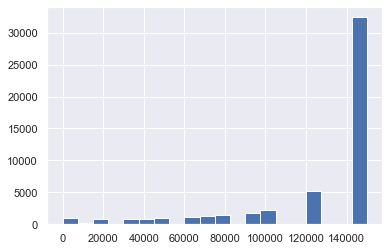

In [137]:
autos["odometer_km"].hist(bins=20, range=[0,150000])

It seems pretty clear that the eBay site forces sellers to list their vehicles with mileage into bin classes with 10k km intervals (and a 5k class as well). If we wanted to do statistical analyses, the fact that everything above 150k km is binned into a single class could cause some issues. We'll leave them in for now. But if we wanted to, say, look at the correlation between price and mileage, we would not get an accurate sense of the relationship due to the lack of resolution from binning at the high end.

For price, finding an upper limit is a bit tricky. The highest "realistic" value seems to be 350k euros, as the next highest price above that is 999k. While infrequent, there are enough listings above 100k that lead me to believe they are accurate. There are a lot of listings at zero, and we'll remove those and any below 10 (numbers seem fairly frequent between 10 and 100, leading me to believe this may be accurate prices).

Now we'll actually remove these outliers from the dataframe.


In [135]:
# remove price outliers
autos2 = autos[autos["price"].between(10,350000)]
autos2.info # confirm the rows were removed
       


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48401 entries, 0 to 49999
Data columns (total 17 columns):
date_crawled          48401 non-null object
name                  48401 non-null object
price                 48401 non-null float64
abtest                48401 non-null object
vehicle_type          43886 non-null object
registration_year     48401 non-null int64
gearbox               46108 non-null object
powerps               48401 non-null int64
model                 45972 non-null object
odometer_km           48401 non-null float64
registration_month    48401 non-null int64
fuel_type             44432 non-null object
brand                 48401 non-null object
unrepaired_damage     39404 non-null object
ad_created            48401 non-null object
postal_code           48401 non-null int64
last_seen             48401 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 6.6+ MB


# Exploring the date range of the data

We can extract the dates from the strings in date-related columns and look at the ranges that they cover.

In [149]:
autos2[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [156]:
# extract just the dates by selecting the first 10 characters in the string
autos2["date_crawled"].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=True)



2016-03-05    0.02538
2016-03-06    0.01394
2016-03-07    0.03596
2016-03-08    0.03330
2016-03-09    0.03322
2016-03-10    0.03212
2016-03-11    0.03248
2016-03-12    0.03678
2016-03-13    0.01556
2016-03-14    0.03662
2016-03-15    0.03398
2016-03-16    0.02950
2016-03-17    0.03152
2016-03-18    0.01306
2016-03-19    0.03490
2016-03-20    0.03782
2016-03-21    0.03752
2016-03-22    0.03294
2016-03-23    0.03238
2016-03-24    0.02910
2016-03-25    0.03174
2016-03-26    0.03248
2016-03-27    0.03104
2016-03-28    0.03484
2016-03-29    0.03418
2016-03-30    0.03362
2016-03-31    0.03192
2016-04-01    0.03380
2016-04-02    0.03540
2016-04-03    0.03868
2016-04-04    0.03652
2016-04-05    0.01310
2016-04-06    0.00318
2016-04-07    0.00142
Name: date_crawled, dtype: float64

These ebay values appear to have been sampled from March to April 2016.

In [157]:
# extract just the dates by selecting the first 10 characters in the string
autos2["ad_created"].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=False)


2016-04-07    0.00128
2016-04-06    0.00326
2016-04-05    0.01184
2016-04-04    0.03688
2016-04-03    0.03892
2016-04-02    0.03508
2016-04-01    0.03380
2016-03-31    0.03192
2016-03-30    0.03344
2016-03-29    0.03414
2016-03-28    0.03496
2016-03-27    0.03090
2016-03-26    0.03256
2016-03-25    0.03188
2016-03-24    0.02908
2016-03-23    0.03218
2016-03-22    0.03280
2016-03-21    0.03772
2016-03-20    0.03786
2016-03-19    0.03384
2016-03-18    0.01372
2016-03-17    0.03120
2016-03-16    0.03000
2016-03-15    0.03374
2016-03-14    0.03522
2016-03-13    0.01692
2016-03-12    0.03662
2016-03-11    0.03278
2016-03-10    0.03186
2016-03-09    0.03324
               ...   
2016-02-21    0.00006
2016-02-20    0.00004
2016-02-19    0.00006
2016-02-18    0.00004
2016-02-17    0.00002
2016-02-16    0.00002
2016-02-14    0.00004
2016-02-12    0.00006
2016-02-11    0.00002
2016-02-09    0.00004
2016-02-08    0.00002
2016-02-07    0.00002
2016-02-05    0.00004
2016-02-02    0.00004
2016-02-01

The ads sampled were created/posted between 2015-06-11 and 2016-04-07.

In [158]:
# extract just the dates by selecting the first 10 characters in the string
autos2["last_seen"].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=False)



2016-04-07    0.13092
2016-04-06    0.22100
2016-04-05    0.12428
2016-04-04    0.02462
2016-04-03    0.02536
2016-04-02    0.02490
2016-04-01    0.02310
2016-03-31    0.02384
2016-03-30    0.02484
2016-03-29    0.02234
2016-03-28    0.02086
2016-03-27    0.01602
2016-03-26    0.01696
2016-03-25    0.01920
2016-03-24    0.01956
2016-03-23    0.01858
2016-03-22    0.02158
2016-03-21    0.02074
2016-03-20    0.02070
2016-03-19    0.01574
2016-03-18    0.00742
2016-03-17    0.02792
2016-03-16    0.01644
2016-03-15    0.01588
2016-03-14    0.01280
2016-03-13    0.00898
2016-03-12    0.02382
2016-03-11    0.01252
2016-03-10    0.01076
2016-03-09    0.00986
2016-03-08    0.00760
2016-03-07    0.00536
2016-03-06    0.00442
2016-03-05    0.00108
Name: last_seen, dtype: float64

The `last_seen` column more or less covers the range that `date_crawled` does.

In [175]:
autos2["registration_year"].describe() 

count    48401.000000
mean      2004.774715
std         88.790201
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

In [176]:
autos2["registration_year"].value_counts().sort_index()

1000       1
1001       1
1111       1
1800       2
1910       4
1927       1
1929       1
1931       1
1934       2
1937       4
1938       1
1939       1
1941       2
1943       1
1948       1
1950       1
1951       2
1952       1
1953       1
1954       2
1955       2
1956       4
1957       2
1958       4
1959       6
1960      22
1961       6
1962       4
1963       8
1964      12
        ... 
2000    3128
2001    2632
2002    2480
2003    2696
2004    2699
2005    2927
2006    2670
2007    2274
2008    2213
2009    2083
2010    1589
2011    1623
2012    1310
2013     802
2014     662
2015     389
2016    1208
2017    1386
2018     469
2019       2
2800       1
4100       1
4500       1
4800       1
5000       4
5911       1
6200       1
8888       1
9000       1
9999       3
Name: registration_year, Length: 95, dtype: int64

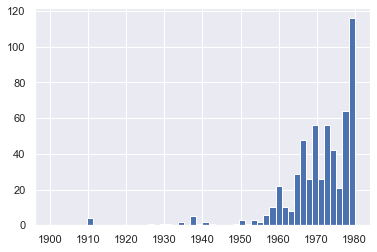

In [173]:
autos2["registration_year"].hist(bins=50, range=[1900,1980])

Let's filter out the erroneous years from `registration_year`.

In [311]:
autos2[autos2["registration_year"]<1940].head()

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,powerps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
2221,2016-03-15 14:57:07,Sehr_seltener_Oldtimer_Opel_1210_zum_Restaurieren,3350.0,control,andere,1934,manuell,0,andere,5000.0,0,benzin,opel,ja,2016-03-15 00:00:00,49828,2016-04-06 06:17:51
2573,2016-03-19 22:51:25,Hanomag_rekord_15k_Suche_ersatz_teile,3000.0,test,andere,1934,NaN,0,NaN,90000.0,1,benzin,sonstige_autos,nein,2016-03-19 00:00:00,90489,2016-03-19 22:51:25
10556,2016-04-01 06:02:10,UNFAL_Auto,450.0,control,NaN,1800,NaN,1800,NaN,5000.0,2,NaN,mitsubishi,nein,2016-04-01 00:00:00,63322,2016-04-01 09:42:30
11246,2016-03-26 19:49:59,Ford_Model_A_Roadster_Deluxe_1931,27500.0,control,cabrio,1931,manuell,39,andere,10000.0,7,benzin,ford,nein,2016-03-26 00:00:00,9322,2016-04-06 09:46:59
21416,2016-03-12 08:36:21,Essex_super_six__Ford_A,16500.0,control,cabrio,1927,manuell,40,andere,5000.0,5,benzin,ford,NaN,2016-03-12 00:00:00,74821,2016-03-15 12:45:12


It's unclear where to put the lower limit - there could be some antique cars being sold - so let's examine the actual entries. Several cars from the 1930's look legit. Below 1929, the entries appear to be erroneous (quite a few are listed for the year 1910 that appear inaccurate). Some entries also go up to 2018 and even 2019, though these numbers were scraped in 2016. Car manufacturers may release e.g. a 2017 model to the market in 2016, but usually only at the end of the year, while these were scraped in 2016. Note that it is possible that we are overfiltering here based on that assumption--some manufacturers could release the next model year even earlier, perhaps.

In [310]:
autos2[autos2["registration_year"]==2017].head()

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,powerps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
10,2016-03-15 01:41:36,VW_Golf_Tuning_in_siber/grau,999.0,test,NaN,2017,manuell,90,NaN,150000.0,4,benzin,volkswagen,nein,2016-03-14 00:00:00,86157,2016-04-07 03:16:21
65,2016-04-04 19:30:39,Ford_Fiesta_zum_ausschlachten,250.0,control,NaN,2017,manuell,65,fiesta,125000.0,9,benzin,ford,NaN,2016-04-04 00:00:00,65606,2016-04-05 12:22:12
68,2016-04-03 17:36:59,Mini_cooper_s_clubman_/vollausstattung_/_Navi/...,10990.0,test,NaN,2017,manuell,174,clubman,100000.0,0,NaN,mini,nein,2016-04-03 00:00:00,83135,2016-04-05 17:26:26
113,2016-04-03 14:58:29,Golf_4_Anfaenger_auto,1200.0,test,NaN,2017,manuell,75,golf,150000.0,7,NaN,volkswagen,NaN,2016-04-03 00:00:00,97656,2016-04-05 14:15:48
197,2016-04-05 10:36:24,VW_Polo_9N_an_Bastler,888.0,control,NaN,2017,manuell,64,polo,20000.0,7,NaN,volkswagen,ja,2016-04-05 00:00:00,58566,2016-04-07 13:16:13


The odometer on many of the 2016 through 2018 model year listings are in the 150000km bin, so these are extremely unlikely to be accurate (ignoring actually inspecting the model names, which would be very time-consuming). I don't have a good explanation for why so many cars have "2017" or "2018" as the model year - perhaps it was a default value on ebay, but that seems odd considering the year was 2016.

We're removing 2017 and 2018, but to fix odd 2016 entries we could set up a condition where any cars from 2016 that have odometer readings above some threshold are considered erroneous entries. We could use a liberal threshold of 100000 km or so.

In [236]:
# remove rows where registration_year is 2016-2018 AND odometer_km > 100000
todrop = autos2[(autos2["registration_year"]==2016) & (autos2["odometer_km"] > 99999)].index
autos3 = autos2.drop(todrop)
autos3 = autos3[autos3["registration_year"].between(1925,2016)]
autos3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45484 entries, 0 to 49999
Data columns (total 17 columns):
date_crawled          45484 non-null object
name                  45484 non-null object
price                 45484 non-null float64
abtest                45484 non-null object
vehicle_type          43883 non-null object
registration_year     45484 non-null int64
gearbox               43566 non-null object
powerps               45484 non-null int64
model                 43435 non-null object
odometer_km           45484 non-null float64
registration_month    45484 non-null int64
fuel_type             42662 non-null object
brand                 45484 non-null object
unrepaired_damage     37775 non-null object
ad_created            45484 non-null object
postal_code           45484 non-null int64
last_seen             45484 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 6.2+ MB


It looks like that removed quite a bit. Let's look at the value counts.

In [237]:
autos3["registration_year"].value_counts().sort_index()

1927       1
1929       1
1931       1
1934       2
1937       4
1938       1
1939       1
1941       2
1943       1
1948       1
1950       1
1951       2
1952       1
1953       1
1954       2
1955       2
1956       4
1957       2
1958       4
1959       6
1960      22
1961       6
1962       4
1963       8
1964      12
1965      17
1966      22
1967      26
1968      26
1969      19
        ... 
1987      72
1988     134
1989     171
1990     342
1991     339
1992     368
1993     424
1994     629
1995    1213
1996    1364
1997    1942
1998    2351
1999    2886
2000    3128
2001    2632
2002    2480
2003    2696
2004    2699
2005    2927
2006    2670
2007    2274
2008    2213
2009    2083
2010    1589
2011    1623
2012    1310
2013     802
2014     662
2015     389
2016     172
Name: registration_year, Length: 77, dtype: int64

Text(0.5, 1.0, 'filtered entries')

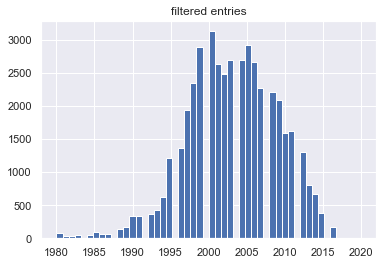

In [238]:
autos3["registration_year"].hist(bins=50, range=[1980,2020])
plt.title("filtered entries")

Text(0.5, 1.0, 'unfiltered entries')

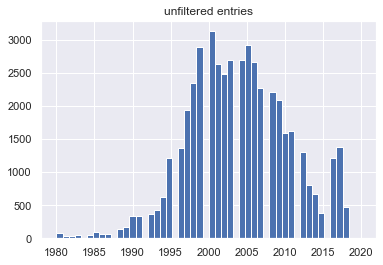

In [239]:
autos2["registration_year"].hist(bins=50, range=[1980,2020])
plt.title("unfiltered entries")

The distribution of registration years looks much more normal after the filtering step removing entries from 2016 with mileage over 100000 km and removing 2017 and 2018 entirely. 

# Aggregating by brand

Let's limit our further analysis to just the most frequent car brands. We'll limit our analysis to those brands that make up at least 1% of the observations.

We'll make a list of the brands that satisfy the condition and use that list in a loop to find the median sale price for each brand, and populate a dictionary with the brand (key) and median (value).

In [275]:


onepercbool = (autos3["brand"].value_counts(normalize=True) > 0.01) # select brands with at least 1% of observations
onepercbrand = oneperc.loc[oneperc].index # extract names of the brands (as the index of the above series) where condition is True

# populate a dictionary with car brand and its mean sale price
aggbrand = {}
for brand in onepercbrand:
    aggbrand[brand] = autos3[autos3["brand"]==brand]["price"].median()
    
aggbrand

{'volkswagen': 3000.0,
 'bmw': 5999.0,
 'opel': 1700.0,
 'mercedes_benz': 5300.0,
 'audi': 6494.5,
 'ford': 1850.0,
 'renault': 1412.5,
 'peugeot': 2170.0,
 'fiat': 1699.5,
 'seat': 2944.0,
 'skoda': 4999.0,
 'nissan': 2500.0,
 'mazda': 2600.0,
 'smart': 2990.0,
 'citroen': 2750.0,
 'toyota': 4050.0,
 'hyundai': 4300.0}

Our results show a range of median prices, from a low of 1412.5 for Renault to a high of 6494.5 for Audi. BMW and Mercedes-Benz join Audi at the top end of the range, as one might expect for these luxury car brands.

Let's look at median mileage to see if there is any obvious link between price and mileage.

In [284]:
aggbrandmile = {}
for brand in onepercbrand:
    aggbrandmile[brand] = autos3[autos3["brand"]==brand]["odometer_km"].median()
    
aggbrandmile

{'volkswagen': 150000.0,
 'bmw': 150000.0,
 'opel': 150000.0,
 'mercedes_benz': 150000.0,
 'audi': 150000.0,
 'ford': 150000.0,
 'renault': 150000.0,
 'peugeot': 150000.0,
 'fiat': 125000.0,
 'seat': 150000.0,
 'skoda': 125000.0,
 'nissan': 150000.0,
 'mazda': 150000.0,
 'smart': 100000.0,
 'citroen': 150000.0,
 'toyota': 125000.0,
 'hyundai': 125000.0}

And here we see the issue I raised before: the imprecise binning of mileage (kilometerage?) above 150,000 km means we have lost a lot of potentially useful information. Most of these brands have a median of 150,000, meaning more than half of the observations have 150,000 km or more on the odometer. Using means gives us a bit more differentiation among brands in terms of average mileage, but it still is based on a misleading distribution of odometer readings. We could remove cars with >150k km from analysis, but that would be removing a lot of data.

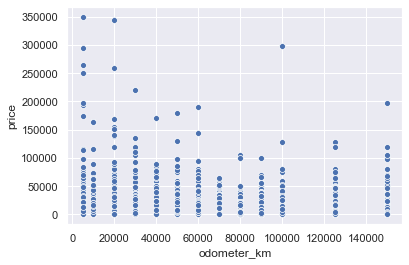

In [287]:
sns.scatterplot(autos3["odometer_km"], autos3["price"])

# price tends to be inversely correlated with mileage, especially up to 100k km

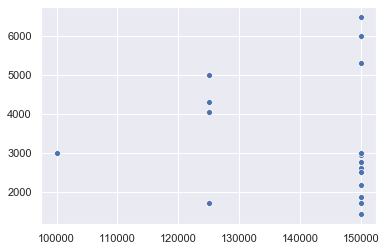

In [288]:
sns.scatterplot(aggbrandmile, aggbrand)

# no obvious relationship here

In [307]:
# make a table from the median values

brand_median = pd.Series(aggbrand, name="median_price")
print(brand_median)

volkswagen       3000.0
bmw              5999.0
opel             1700.0
mercedes_benz    5300.0
audi             6494.5
ford             1850.0
renault          1412.5
peugeot          2170.0
fiat             1699.5
seat             2944.0
skoda            4999.0
nissan           2500.0
mazda            2600.0
smart            2990.0
citroen          2750.0
toyota           4050.0
hyundai          4300.0
Name: median_price, dtype: float64


In [308]:
# make into a dataframe

brand_df = pd.DataFrame(brand_median)#, columns=["median_price"]) # can name the column using "columns" arg if series isn't already named
print(brand_df)

               median_price
volkswagen           3000.0
bmw                  5999.0
opel                 1700.0
mercedes_benz        5300.0
audi                 6494.5
ford                 1850.0
renault              1412.5
peugeot              2170.0
fiat                 1699.5
seat                 2944.0
skoda                4999.0
nissan               2500.0
mazda                2600.0
smart                2990.0
citroen              2750.0
toyota               4050.0
hyundai              4300.0


In [309]:
# add the median mileage column

pd.concat([brand_median, pd.Series(aggbrandmile, name="median_mileage")], axis=1)



,median_price,median_mileage
volkswagen,3000.0,150000.0
bmw,5999.0,150000.0
opel,1700.0,150000.0
mercedes_benz,5300.0,150000.0
audi,6494.5,150000.0
ford,1850.0,150000.0
renault,1412.5,150000.0
peugeot,2170.0,150000.0
fiat,1699.5,125000.0
seat,2944.0,150000.0
